## TENSORFLOW

https://www.tensorflow.org/get_started/get_started#tensorflow_core_tutorial

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#High level API (for dummies)
highlevel = tf.contrib.learn
help(highlevel)
#Here we will learn TensorFlow Core API

**Tensor** is a set of primitive values shaped into any array any dimensions. Rank of tensor is number of dimensions.

In [ ]:
#tensors examples
3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

TensorFlow Core programs as consisting of two discrete sections:

1. Building the computational graph
2. Running the computational graph

 A **computational graph** is a series of TensorFlow operations arranged into a graph of nodes
 
 To actually **evaluate** the nodes, we must run the computational graph within a session. A **session** encapsulates the control and state of the TensorFlow runtime

In [ ]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) #also float
print(node1, node2)

In [ ]:
sess = tf.Session()
sess.run([node1, node2])

In [ ]:
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

res = sess.run(node3)
print res, type(res)

A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a **promise** to provide a value later.

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)
#the above lines is similar to function/lambda

In [ ]:
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

In [ ]:
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b:4.5}))

#### linear regression example

In [ ]:
#variables
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
y_pred = W * x + b

init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(y_pred, {x:[1,2,3,4]}))

In [ ]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(y_pred - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

In [ ]:
fixW = tf.assign(W, [-1.])   #`assign` allows to change variable
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init) # reset values to incorrect defaults.
for _ in range(1000):
    sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})

print(sess.run([W, b]))

#### The completed trainable linear regression model

In [ ]:
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for _ in xrange(10000):
    sess.run(train, {x:x_train, y:y_train})
    curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s\r"%(curr_W, curr_b, curr_loss)),

# evaluate training accuracy
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

#### MNIST For ML Beginners

In [ ]:
from IPython.display import Image
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
print "shape of train data: {}".format(mnist.train.images.shape)
print "shape of train labels: {}".format(mnist.train.labels.shape)
print "shape of test data: {}".format(mnist.test.images.shape)
print "shape of test labels: {}".format(mnist.test.labels.shape)

In [3]:
#function to visualization of  
def printDigit(matrix, hot_label):
    matrix = matrix.reshape((28, 28))
    label = np.where(hot_label==1)[0][0]  #decode hot-encoded label
    plt.figure(figsize = (1.5,1.5))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(matrix, cmap='plasma')
    plt.show()

In [ ]:
for i in range(3):
    printDigit(mnist.test.images[i+1000], mnist.test.labels[i+1000])

In [ ]:
Image(filename='Screenshot_1.png')

In [ ]:
Image(filename='Screenshot_2.png')

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) # None means that a dimension can be of any length

In [ ]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Notice that W has a shape of [784, 10] because we want to multiply the 784-dimensional image vectors by it to produce 10-dimensional vectors of evidence for the difference classes. b has a shape of [10] so we can add it to the output.

In [ ]:
#our model
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [ ]:
#loss function is cross entropy (like log loss)
#https://docs.google.com/a/iponweb.net/spreadsheets/d/1pW_Tyb-5sYwIfdseWeir0R23pI9SfEtOVao8p8AMbEs/edit?usp=sharing
y_ = tf.placeholder(tf.float32, [None, 10]) #true answer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#such implementation is unstable becouse log(0) is undefined
#so, there is build in function in tensorflow
#tf.nn.softmax_cross_entropy_with_logits() 
#     https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits

In [ ]:
#optimisation
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
tf.global_variables_initializer().run()

In [ ]:
import time
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(1000)
    sess.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
    print "{}\r".format(cross_entropy.eval(feed_dict={x: batch_xs, y_: batch_ys})),
    time.sleep(0.01)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

#### Deep MNIST for Experts

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


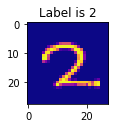

In [4]:
printDigit(mnist.test.images[77], mnist.test.labels[77])

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 784])  #features
y_ = tf.placeholder(tf.float32, shape=[None, 10])  #true targets

In [ ]:
# 1 linear layer (it means there is no hidden layers)
W = tf.Variable(tf.zeros([784,10]))  #786 - number of features, 10 - outout dimension
b = tf.Variable(tf.zeros([10]))

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
#predictions
y = tf.matmul(x,W) + b

In [ ]:
#loss function (average value of cross entropy for all objects)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [ ]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [ ]:
train_step   #it is operation
             #you can run it using command train_step.run(session = sess)

In [ ]:
#estimate accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [ ]:
%%time
average_train_losses = []; average_test_losses = []
accuracy_train = []; accuracy_test = []
steps = []


num_steps = 50001
for step in tqdm_notebook(range(num_steps)):
    batch = mnist.train.next_batch(100)
    _ = sess.run(train_step, feed_dict={x: batch[0], y_: batch[1]})
    
    #collect stats
    period = num_steps/20 #20 points
    if step % period == 0:
        if step > 0:
            #losts
            loss_train = sess.run(cross_entropy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
            average_train_losses.append(loss_train)
            loss_test = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            average_test_losses.append(loss_test)
            
            #accuracy
            accuracy_train_one = accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels})
            accuracy_train.append(accuracy_train_one)
            accuracy_test_one = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            accuracy_test.append(accuracy_test_one)
            
            steps.append(step)
            
    #print "progress {:2.2%}\r".format(float(step)/num_steps), 

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(steps, average_train_losses,'.-', c='g')
plt.plot(steps, average_test_losses, '.-', c='r')
plt.grid()
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(steps, accuracy_train,'.-', c='g')
plt.plot(steps, accuracy_test, '.-', c='r')
plt.grid()
plt.xlabel("step")
plt.ylabel("accuracy")
plt.show()

In [ ]:
#final accuracy
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

**Multilayer Convolutional Network**

In [62]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [63]:
# weight inotialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, mean=0.0, stddev=0.1)   #init by random values ~N(0.0,0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)   #init by constant
    return tf.Variable(initial)

In [64]:
# convolution ad pooling

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [65]:
# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, 32])     #32 maps, tune
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])
#-1 - is the special value, the size of that dimension is computed so that the total size remains constant
#28,28 - width and height
#1 - RGB numbers (we have black and white pics, therefore we have only 1 number)

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [66]:
# second convolutional layer

W_conv2 = weight_variable([5, 5, 32, 64])    #64 maps, tune
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)  #28*28 --> 14*14

In [67]:
# densely connected layer
 
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [68]:
# dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [69]:
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
# Train and Evaluate the Model

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50) 
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

In [124]:
sess.run(tf.global_variables_initializer())

# FOR KAGGLE

https://www.tensorflow.org/get_started/mnist/pros#f1

In [1]:
#SETTINGS:

NUM_FILTERS_CONV_1 = 32*2
NUM_FILTERS_CONV_2 = 64*2
NUM_FILTERS_CONV_3 = 128*2
NUM_READOUT_NEURONS = 2048*2

KEEP_PROB = 0.4
LEARNING_RATE = 1.0e-5
TEST_SIZE = 0.001     #0.0002
NUMBER_STEPS = 500000
BATCH_SIZE = 100

thersold_good_prediction = 0.999999999
NUMBER_STEPS_TEST = 50000
AFTER_NUM_STEPS_APPEND_TEST_DATA = 50000 #every the number ew append test date to train

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
from sklearn import model_selection
from matplotlib import pyplot as plt
%matplotlib inline
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
X = train.drop('label', axis = 1).values
y = train['label'].values

#function to One-Hot-Encoding target variable
#example: 3 ---> [0,0,0,1,0,0,0,0,0,0]
def encodeTarget(Y):
    temp = np.zeros((y.size, y.max()+1))
    temp[np.arange(y.size), y] = 1
    return temp

y = encodeTarget(y)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = TEST_SIZE)
x_test_to_submit = test.values
del train, test, X, y
print(X_train.shape, y_train.shape, x_test_to_submit.shape)

((41958, 784), (41958, 10), (28000, 784))


In [5]:
#function for digits visualization  
def printDigit(matrix, hot_label):
    matrix = matrix.reshape((28, 28))
    label = np.where(hot_label==1)[0][0]  #decode hot-encoded label
    plt.figure(figsize = (1.5,1.5))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(matrix, cmap='plasma')
    plt.show()

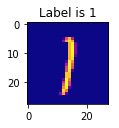

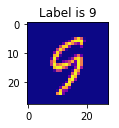

In [6]:
printDigit(X_train[7,:], y_train[7])
printDigit(X_train[777,:], y_train[777])

In [7]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])  #features
y_ = tf.placeholder(tf.float32, shape=[None, 10])  #true targets

In [8]:
# weight inotialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, mean=0.0, stddev=0.1)   #init by random values ~N(0.0,0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)   #init by constant
    return tf.Variable(initial)

In [9]:
# First Convolutional Layer
W_conv1 = weight_variable([5, 5, 1, NUM_FILTERS_CONV_1])     #32 maps, tune
b_conv1 = bias_variable([NUM_FILTERS_CONV_1])

x_image = tf.reshape(x, [-1,28,28,1])
#-1 - is the special value, the size of that dimension is computed so that the total size remains constant
#28,28 - width and height
#1 - RGB numbers (we have black and white pics, therefore we have only 1 number)

#convolution layer, activation function and pooling layer
h_conv1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME')
h_relu1 = tf.nn.relu(h_conv1 + b_conv1)
h_pool1 = tf.nn.max_pool(h_relu1, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME') #28*28 --> 14*14

In [10]:
# second convolutional layer

W_conv2 = weight_variable([5, 5, NUM_FILTERS_CONV_1, NUM_FILTERS_CONV_2])
b_conv2 = bias_variable([NUM_FILTERS_CONV_2])
a
h_conv2 = tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME')
h_relu2 = tf.nn.relu(h_conv2 + b_conv2)
h_pool2 = tf.nn.max_pool(h_relu2, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME') #14*14 --> 7*7

In [11]:
# third convolutional layer

W_conv3 = weight_variable([3, 3, NUM_FILTERS_CONV_2, NUM_FILTERS_CONV_3])
b_conv3 = bias_variable([NUM_FILTERS_CONV_3])

h_conv3 = tf.nn.conv2d(h_pool2, W_conv3, strides=[1, 1, 1, 1], padding='SAME')
h_relu3 = tf.nn.relu(h_conv3 + b_conv3)
h_pool3 = tf.nn.max_pool(h_relu3, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME') #7*7 --> 4*4

In [12]:
#TESTING

#sess.run(tf.global_variables_initializer())
#batch = next_batch(BATCH_SIZE)
#h_pool3.eval(feed_dict={x:batch[0], y_: batch[1]})

In [13]:
# densely connected layer
 
W_fc1 = weight_variable([4 * 4 * NUM_FILTERS_CONV_3, NUM_READOUT_NEURONS])
b_fc1 = bias_variable([NUM_READOUT_NEURONS])

h_pool3_flat = tf.reshape(h_pool3, [-1, 4*4*NUM_FILTERS_CONV_3])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

In [14]:
# dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [15]:
# readout layer
W_fc2 = weight_variable([NUM_READOUT_NEURONS, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [16]:
def next_batch(batch_size):
    #get next batch
    global data_index
    batch = X_train[data_index:data_index+batch_size,:]
    labels = y_train[data_index:data_index+batch_size,:]
    data_index = (data_index + batch_size) % (X_train.shape[0])
    return (batch, labels)

In [17]:
def next_batch_from_test(batch_size, X_add , y_add):
    #get next batch
    global data_index_test
    batch = X_add[data_index_test:data_index_test+batch_size,:]
    labels = y_add[data_index_test:data_index_test+batch_size,:]
    data_index_test = (data_index_test + batch_size) % (X_train.shape[0])
    return (batch, labels)

In [18]:
def mark_test_data_and_extract_well_predicted():
    #idea:
    #if prelimenary trained algo show very high probability a digits belong to the class, 
    # we'll append it to training sample and retrain the algo
    
    size = 100
    batches_generator = (x_test_to_submit[i:i + size] for i in range(0, len(x_test_to_submit), size))
    predictions = []
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
    y_pred_digits = tf.argmax(y_conv,1)
       
    for test_batch in batches_generator:
        predicted = y_conv.eval(feed_dict={x:test_batch, keep_prob: 1.0})
        predictions.extend(predicted)
    
    predictions = np.array(predictions)           # to numpy array
    predictions = tf.nn.softmax(predictions).eval()
    predictions = (predictions > thersold_good_prediction).astype(int)    #transform to [0,0,0,1,0,0,]
                                                                          #if there is no outstanding value,
                                                                          #predicted will consist of zeros
    bool_values = np.any(predictions, axis = 1)   # True means there is non-zero element
                                                  # False means all elements equal zeros
    indexes = np.argwhere(bool_values).ravel()     # indexes of "True"
    return x_test_to_submit[indexes], predictions[indexes]            

In [ ]:
# Train and Evaluate the Model
data_index = 0
data_index_test = 0

stats = []
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in tqdm_notebook(range(NUMBER_STEPS)):
    batch = next_batch(BATCH_SIZE)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        valid_accuracy = accuracy.eval(feed_dict={x:X_valid, y_: y_valid, keep_prob: 1.0})
        stats.append([i,train_accuracy,valid_accuracy])
        print("step %d, training/valid accuracy %.3g\t%.3g"%(i, train_accuracy, valid_accuracy))
    
    # append test data to train
    if i%AFTER_NUM_STEPS_APPEND_TEST_DATA == 0 and i!=0:  
        X_add, y_add = mark_test_data_and_extract_well_predicted()
        for j in tqdm_notebook(range(NUMBER_STEPS_TEST)):
            batch_test =  next_batch_from_test(BATCH_SIZE, X_add , y_add)
            if j%100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x:batch_test[0], y_: batch_test[1], keep_prob: 1.0})
                valid_accuracy = accuracy.eval(feed_dict={x:X_valid, y_: y_valid, keep_prob: 1.0})
                print("test data, step %d, training/valid accuracy %.3g\t%.3g"%(j, train_accuracy, valid_accuracy))

            train_step.run(feed_dict={x: batch_test[0], y_: batch_test[1], keep_prob: KEEP_PROB})
    
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: KEEP_PROB})

In [ ]:
#plot chartsz
plt.figure(figsize=(10,5))
steps = [a for a,b,c in stats][1:]
train_acc = [b for a,b,c in stats][1:]
test_acc = [c for a,b,c in stats][1:]

plt.plot(steps,train_acc, label = "train", c='b')
plt.plot(steps,test_acc, label = "test", c='r')
plt.grid(True)
plt.title("accuracy VS step", fontsize = 14)
plt.ylabel("accuracy", fontsize = 13)
plt.xlabel("step", fontsize = 13)
plt.legend()
plt.show()

In [ ]:
#predict by batch (without such tric, Memory Error raises):
size = 100
batches_generator = (x_test_to_submit[i:i + size] for i in range(0, len(x_test_to_submit), size))
predictions = []
y_pred_digits = tf.argmax(y_conv,1)
for test_batch in batches_generator:
    predictions.extend(y_pred_digits.eval(feed_dict={x:test_batch, keep_prob: 1.0}))

In [ ]:
    #save results
    header = "ImageId,Label\n"
    with open("results.csv", 'w') as f:
        f.write(header)
        f.write("\n".join(("{},{}".format(ind+1, dig) for ind,dig in enumerate(predictions))))

In [ ]:
"DONE"